In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [123]:
X_train_FS = pd.read_csv('X_train_FS.csv')
X_test_FS = pd.read_csv('X_test_FS.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [124]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_FS)
X_test_pca = pca.transform(X_test_FS)

In [125]:
explained_variance = pca.explained_variance_ratio_

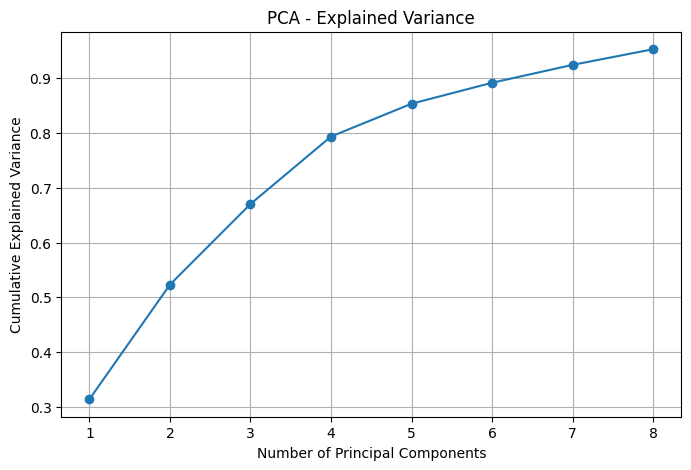

In [126]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()


In [127]:
X_train_PCA_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(8)])
X_test_PCA_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(8)])
X_train_PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.933968,1.085736,0.759634,0.155094,0.603796,-0.108632,0.273015,-0.115952
1,0.058919,-0.528599,-0.788851,-0.495071,0.196950,0.832893,-0.155348,-0.254549
2,0.813338,0.639728,-0.703115,-0.533338,0.142959,0.879870,-0.111072,-0.337939
3,0.646843,0.649837,0.559306,0.428497,0.504516,0.759194,-0.575884,0.087876
4,1.756393,0.651144,-0.681807,0.522315,0.084111,-0.573089,0.172647,0.187436


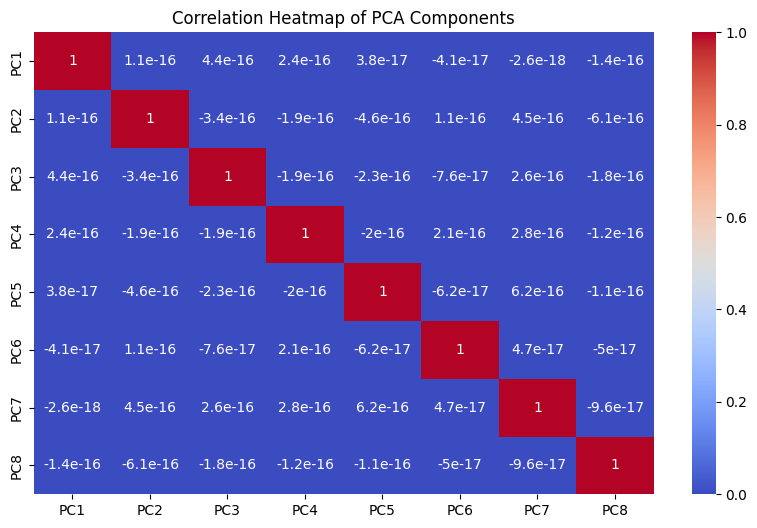

In [128]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_PCA_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of PCA Components')
plt.show()

In [129]:
pd.DataFrame(X_train_PCA_df).to_csv('X_train_PCA.csv', index=False)
pd.DataFrame(X_test_PCA_df).to_csv('X_test_PCA.csv', index=False)